<p style="font-family: Times New Roman; font-size:3.75em;color:#05b09e; font-style:bold">DSE 200X: MINI PROJECT<p style="font-family: Times New Roman; font-size:2em;color:gray; font-style:bold">ANALYSIS OF CO2 EMISSION BY POPULATION AND REGION
<br>
<br>
<br>

# <p style = "font-family: Times New Roman; font-size: 0.75em; color: #007166; font-style: bold">IMPORTING RELEVANT LIBRARIES

In [402]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium.plugins import HeatMap

# <p style = "font-family: Times New Roman; font-size: 0.75em; color: #007166; font-style: bold"> DATA PREPARATION

## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> POPULATION DATA PREP

In [403]:
# Importing Dataset
indicators = pd.read_csv('./WDI/Indicators.csv')

In [404]:
#Show Indicator Data
indicators.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [405]:
#Filter Indicators Data to Get Population Only
population = indicators[indicators['IndicatorName'].str.contains('Population, total')]

population.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
73,Arab World,ARB,"Population, total",SP.POP.TOTL,1960,9.249590e+07
150,Caribbean small states,CSS,"Population, total",SP.POP.TOTL,1960,4.190810e+06
221,Central Europe and the Baltics,CEB,"Population, total",SP.POP.TOTL,1960,9.140158e+07
341,East Asia & Pacific (all income levels),EAS,"Population, total",SP.POP.TOTL,1960,1.042475e+09
462,East Asia & Pacific (developing only),EAP,"Population, total",SP.POP.TOTL,1960,8.964930e+08


## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> TOTAL CO2 EMISSION DATA PREP

In [406]:
#Filter Indicators Data to Get CO2 Emissions in kilotons Only
emission = indicators[indicators['IndicatorName'].str.contains("CO2 emissions (kt)", regex=False)]

#Show Emission Data
emission.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
7,Arab World,ARB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.956399e+04
85,Caribbean small states,CSS,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,5.878201e+03
165,Central Europe and the Baltics,CEB,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,4.674500e+05
238,East Asia & Pacific (all income levels),EAS,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,1.211359e+06
361,East Asia & Pacific (developing only),EAP,CO2 emissions (kt),EN.ATM.CO2E.KT,1960,8.541146e+05


## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> CO2 EMISSIONS PERCAPITA DATA PREP

In [407]:
#Filter Indicators Data to Get CO2 Emissions in kilotons Only
emission_percap= indicators[indicators['IndicatorName'].str.contains("CO2 emissions (metric tons per capita)", regex=False)]

#Show Emission Data
emission_percap.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
8,Arab World,ARB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.643964
86,Caribbean small states,CSS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.402641
166,Central Europe and the Baltics,CEB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,5.114244
239,East Asia & Pacific (all income levels),EAS,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,1.162003
362,East Asia & Pacific (developing only),EAP,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,1960,0.952729


## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> %ELECTRICITY FROM RENEWABLE ENERGY SOURCES DATA PREP

In [408]:
#Filter Indicators Data to Get Electricity Production from Penewable Sources, Excluding Hydroelectric (% of total) Only
r_energy = indicators[indicators['IndicatorName'].str.contains("Electricity production from renewable sources, excluding hydroelectric (% of total)", regex=False)]

#Show Emission Data
r_energy.head()


,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
503,Euro area,EMU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.615391
821,European Union,EUU,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.352812
1113,High income,HIC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.150760
1313,High income: OECD,OEC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.176297
2446,North America,NAC,"Electricity production from renewable sources,...",EG.ELC.RNWX.ZS,1960,0.013318


## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> HEATMAP DATA PREP

In [409]:
coord = pd.read_csv('./WDI/world_country_and_usa_states_latitude_and_longitude_values.csv')[['country_code','latitude','longitude']]

In [410]:
cc=pd.read_csv('./WDI/Country_Region.csv')[['alpha-2','alpha-3']]
cc.set_index('alpha-2', inplace=True)
cc_d = cc.to_dict()['alpha-3']

In [411]:
coord['al_3'] = coord['country_code'].map(cc_d)

In [412]:
coord.pop('country_code')

0      AD
1      AE
2      AF
3      AG
4      AI
       ..
240    YE
241    YT
242    ZA
243    ZM
244    ZW
Name: country_code, Length: 245, dtype: object

In [413]:
coord.rename(columns={'al_3':'CountryCode'}, inplace=True)

coord.head()

,latitude,longitude,CountryCode
0,42.546245,1.601554,AND
1,23.424076,53.847818,ARE
2,33.939110,67.709953,AFG
3,17.060816,-61.796428,ATG
4,18.220554,-63.068615,AIA


In [414]:
htmap_con = emission_percap.merge(coord, on='CountryCode')
htmap_con.head()
htmap = htmap_con[['CountryCode','latitude','longitude','Value']]
htmap_data = htmap.groupby(by='CountryCode', as_index=False).mean()
htmap_data.pop('CountryCode')
htmap_data.head()

,latitude,longitude,Value
0,12.521110,-69.968338,21.766264
1,33.939110,67.709953,0.139113
2,-11.202692,17.873887,0.610377
3,41.153332,20.168331,1.657433
4,23.424076,53.847818,31.844877


# <p style = "font-family: Times New Roman; font-size: 0.75em; color: #007166; font-style: bold"> DATA EXPLORATION

In [415]:
#statistical Exploration
population.describe(), emission.describe(), emission_percap.describe(), r_energy.describe()

(               Year         Value
 count  13484.000000  1.348400e+04
 mean    1987.078241  1.424874e+08
 std       15.884611  5.508349e+08
 min     1960.000000  4.279000e+03
 25%     1973.000000  8.273930e+05
 50%     1987.000000  5.446404e+06
 75%     2001.000000  2.755418e+07
 max     2014.000000  7.260711e+09,
                Year         Value
 count  10602.000000  1.060200e+04
 mean    1986.795605  5.938210e+05
 std       15.060498  2.333120e+06
 min     1960.000000  3.667000e+00
 25%     1974.000000  8.764130e+02
 50%     1988.000000  8.316756e+03
 75%     2000.000000  8.819318e+04
 max     2011.000000  3.464948e+07,
                Year         Value
 count  10599.000000  10599.000000
 mean    1986.793848      4.314669
 std       15.062262      7.186486
 min     1960.000000      0.000580
 25%     1974.000000      0.413003
 50%     1988.000000      1.590400
 75%     2000.000000      6.007173
 max     2011.000000     99.840439,
               Year        Value
 count  6761.000000

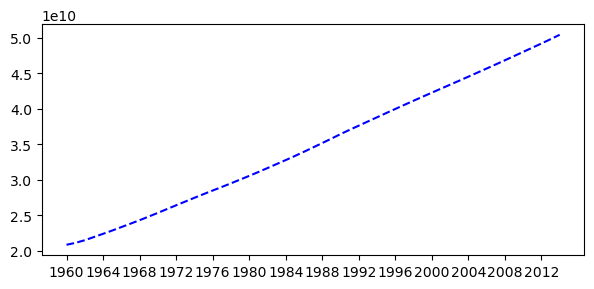

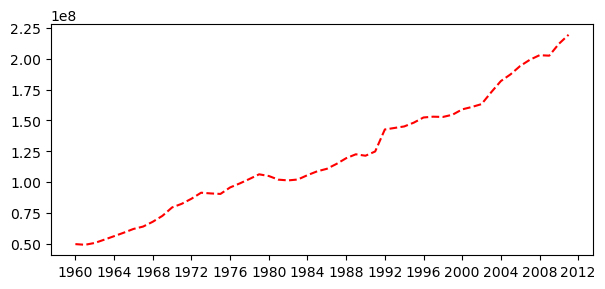

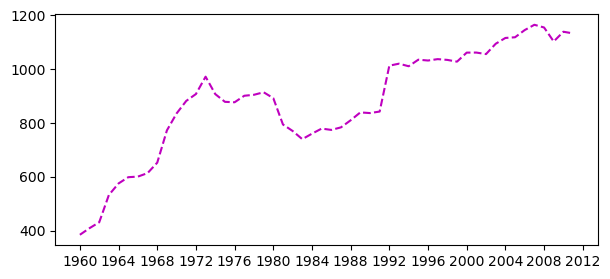

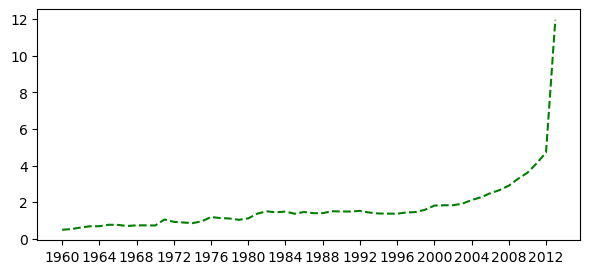

In [416]:
%matplotlib inline

#Plot Value by Year for Year with Highest Recorded Population
plt.figure(figsize=(7,3))
pop_year = population.groupby(by='Year', as_index=False).sum()
plt.plot(pop_year['Year'], pop_year['Value'], 'b--')
plt.xticks(np.arange(1960,2016,4))
plt.show()

#Plot CO2 Emissions
plt.figure(figsize=(7,3))
CO2_year = emission.groupby(by='Year', as_index=False).sum()
plt.plot(CO2_year['Year'], CO2_year['Value'], 'r--')
plt.xticks(np.arange(1960,2016,4))
plt.show()

#Plot CO2 Emissions
plt.figure(figsize=(7,3))
CO2_year = emission_percap.groupby(by='Year', as_index=False).sum()
plt.plot(CO2_year['Year'], CO2_year['Value'], 'm--')
plt.xticks(np.arange(1960,2016,4))
plt.show()

#Plot %r_energy
plt.figure(figsize=(7,3))
energy_year = r_energy.groupby(by='Year', as_index=False).mean()
plt.plot(energy_year['Year'], energy_year['Value'], 'g--')
plt.xticks(np.arange(1960,2016,4))
plt.show()
#Year with Highest Recorded Population = Last Year of Data Reporting - 2014
#pop_year[pop_year['Year']==2011]

In [417]:
#2011 Population Data
pop_2011 = population[population['Year']==2011][['CountryCode', 'Value']]

#2011 Emission Data
CO2_2011 = emission[emission['Year']==2011][['CountryCode', 'Value']]

#2011 Emission Data
CO2pc_2011 = emission_percap[emission_percap['Year']==2011][['CountryCode', 'Value']]

#2011 Renewable Electricity Source % Data
energy_2011 = r_energy[r_energy['Year']==2011][['CountryCode', 'Value']]

#Consolidated Data & Plot Data
con_data = pop_2011.merge(CO2_2011,on='CountryCode').merge(energy_2011, on='CountryCode')
con_data.rename(columns={'Value_x': 'pop', 'Value_y': 'CO2', 'Value': 'R_Energy'}, inplace= True)

con_data = con_data.merge(CO2pc_2011, on='CountryCode')
con_data.rename(columns={'Value': 'CO2pc'}, inplace= True)

#Show Plot Data
con_data['e_pop']=con_data['pop']*10**-6.6
con_data.head()

,CountryCode,pop,CO2,R_Energy,CO2pc,e_pop
0,ARB,3.607616e+08,1.704418e+06,0.281077,4.724500,90.619210
1,CEB,1.041740e+08,7.199604e+05,5.240276,6.911131,26.167335
2,EAS,2.219079e+09,1.300280e+07,2.614576,5.859548,557.407461
3,EAP,1.977638e+09,1.048642e+07,2.402762,5.302499,496.760194
4,EMU,3.369586e+08,2.403352e+06,12.301304,7.132483,84.640185


# <p style = "font-family: Times New Roman; font-size: 0.75em; color: #007166; font-style: bold"> DATA VISUALIZATION

## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> CO2 EMISSIONS VS POPULATION AND %ELECTRICITY FROM RENEWABLE ENERGY SOURCES

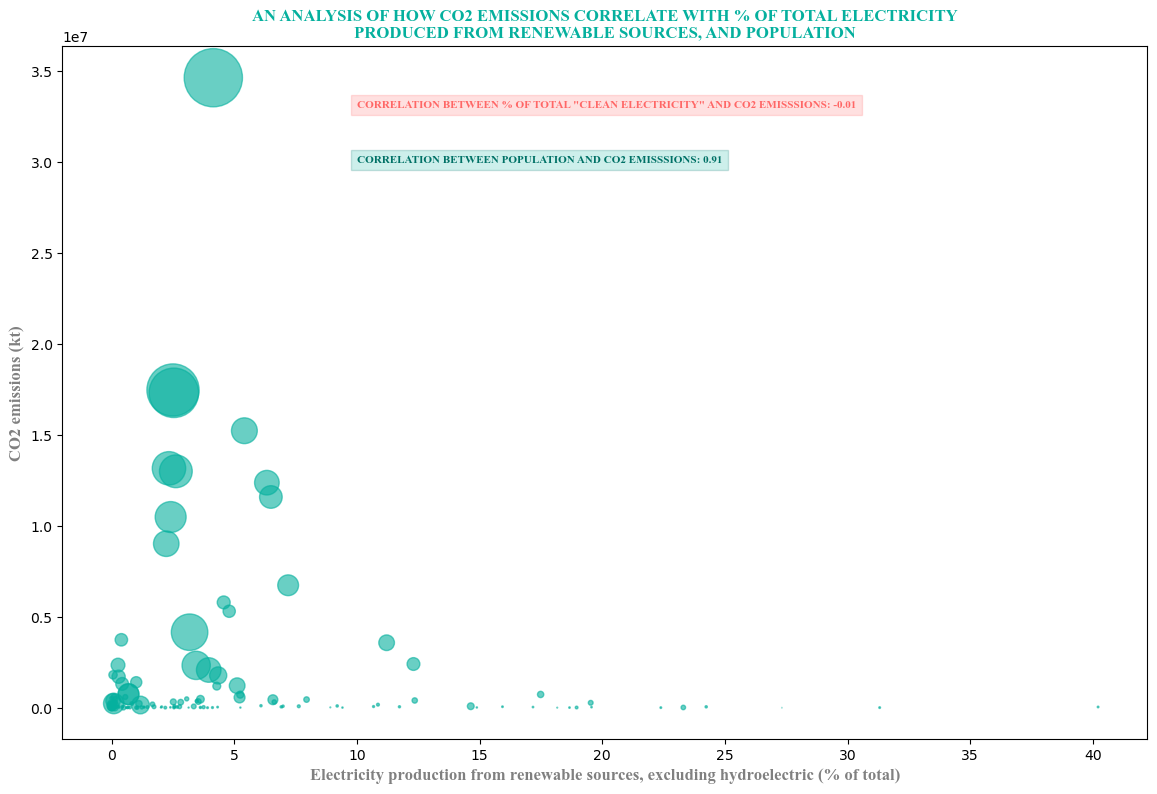

In [424]:
#TRIAL
plt.figure(figsize=(14,9),)
plt.scatter(con_data['R_Energy'], con_data['CO2'],s=con_data['e_pop'].values, c= '#05b09e',alpha = 0.6)
plt.xlabel(r_energy['IndicatorName'].iloc[0], fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'gray'})
plt.ylabel(emission['IndicatorName'].iloc[0], fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'gray'})
plt.title('AN ANALYSIS OF HOW CO2 EMISSIONS CORRELATE WITH % OF TOTAL ELECTRICITY' + chr(10) +'PRODUCED FROM RENEWABLE SOURCES, AND POPULATION', fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#05b09e'})
cor1 = 'CORRELATION BETWEEN POPULATION AND CO2 EMISSSIONS: '+ str(np.round((np.corrcoef(con_data['pop'], con_data['CO2'])[1,0]), 2))
plt.text(10, 3e7,cor1, fontdict={'fontname': 'Times New Roman', 'fontsize': 8, 'fontweight':'bold', 'color':'#007166'},  bbox=dict(fc='#05b09e', ec='#007166', alpha=0.2, color='#05b09e'))
cor2 = 'CORRELATION BETWEEN % OF TOTAL \"CLEAN ELECTRICITY\" AND CO2 EMISSSIONS: '+ str(np.round((np.corrcoef(con_data['R_Energy'], con_data['CO2'])[1,0]), 2))
plt.text(10, 3.3e7,cor2, fontdict={'fontname': 'Times New Roman', 'fontsize': 8, 'fontweight':'bold', 'color':'#ff6766'},  bbox=dict(fc='#ff6766', ec='#ff6766', alpha=0.2, color='#05b09e'))
plt.show()

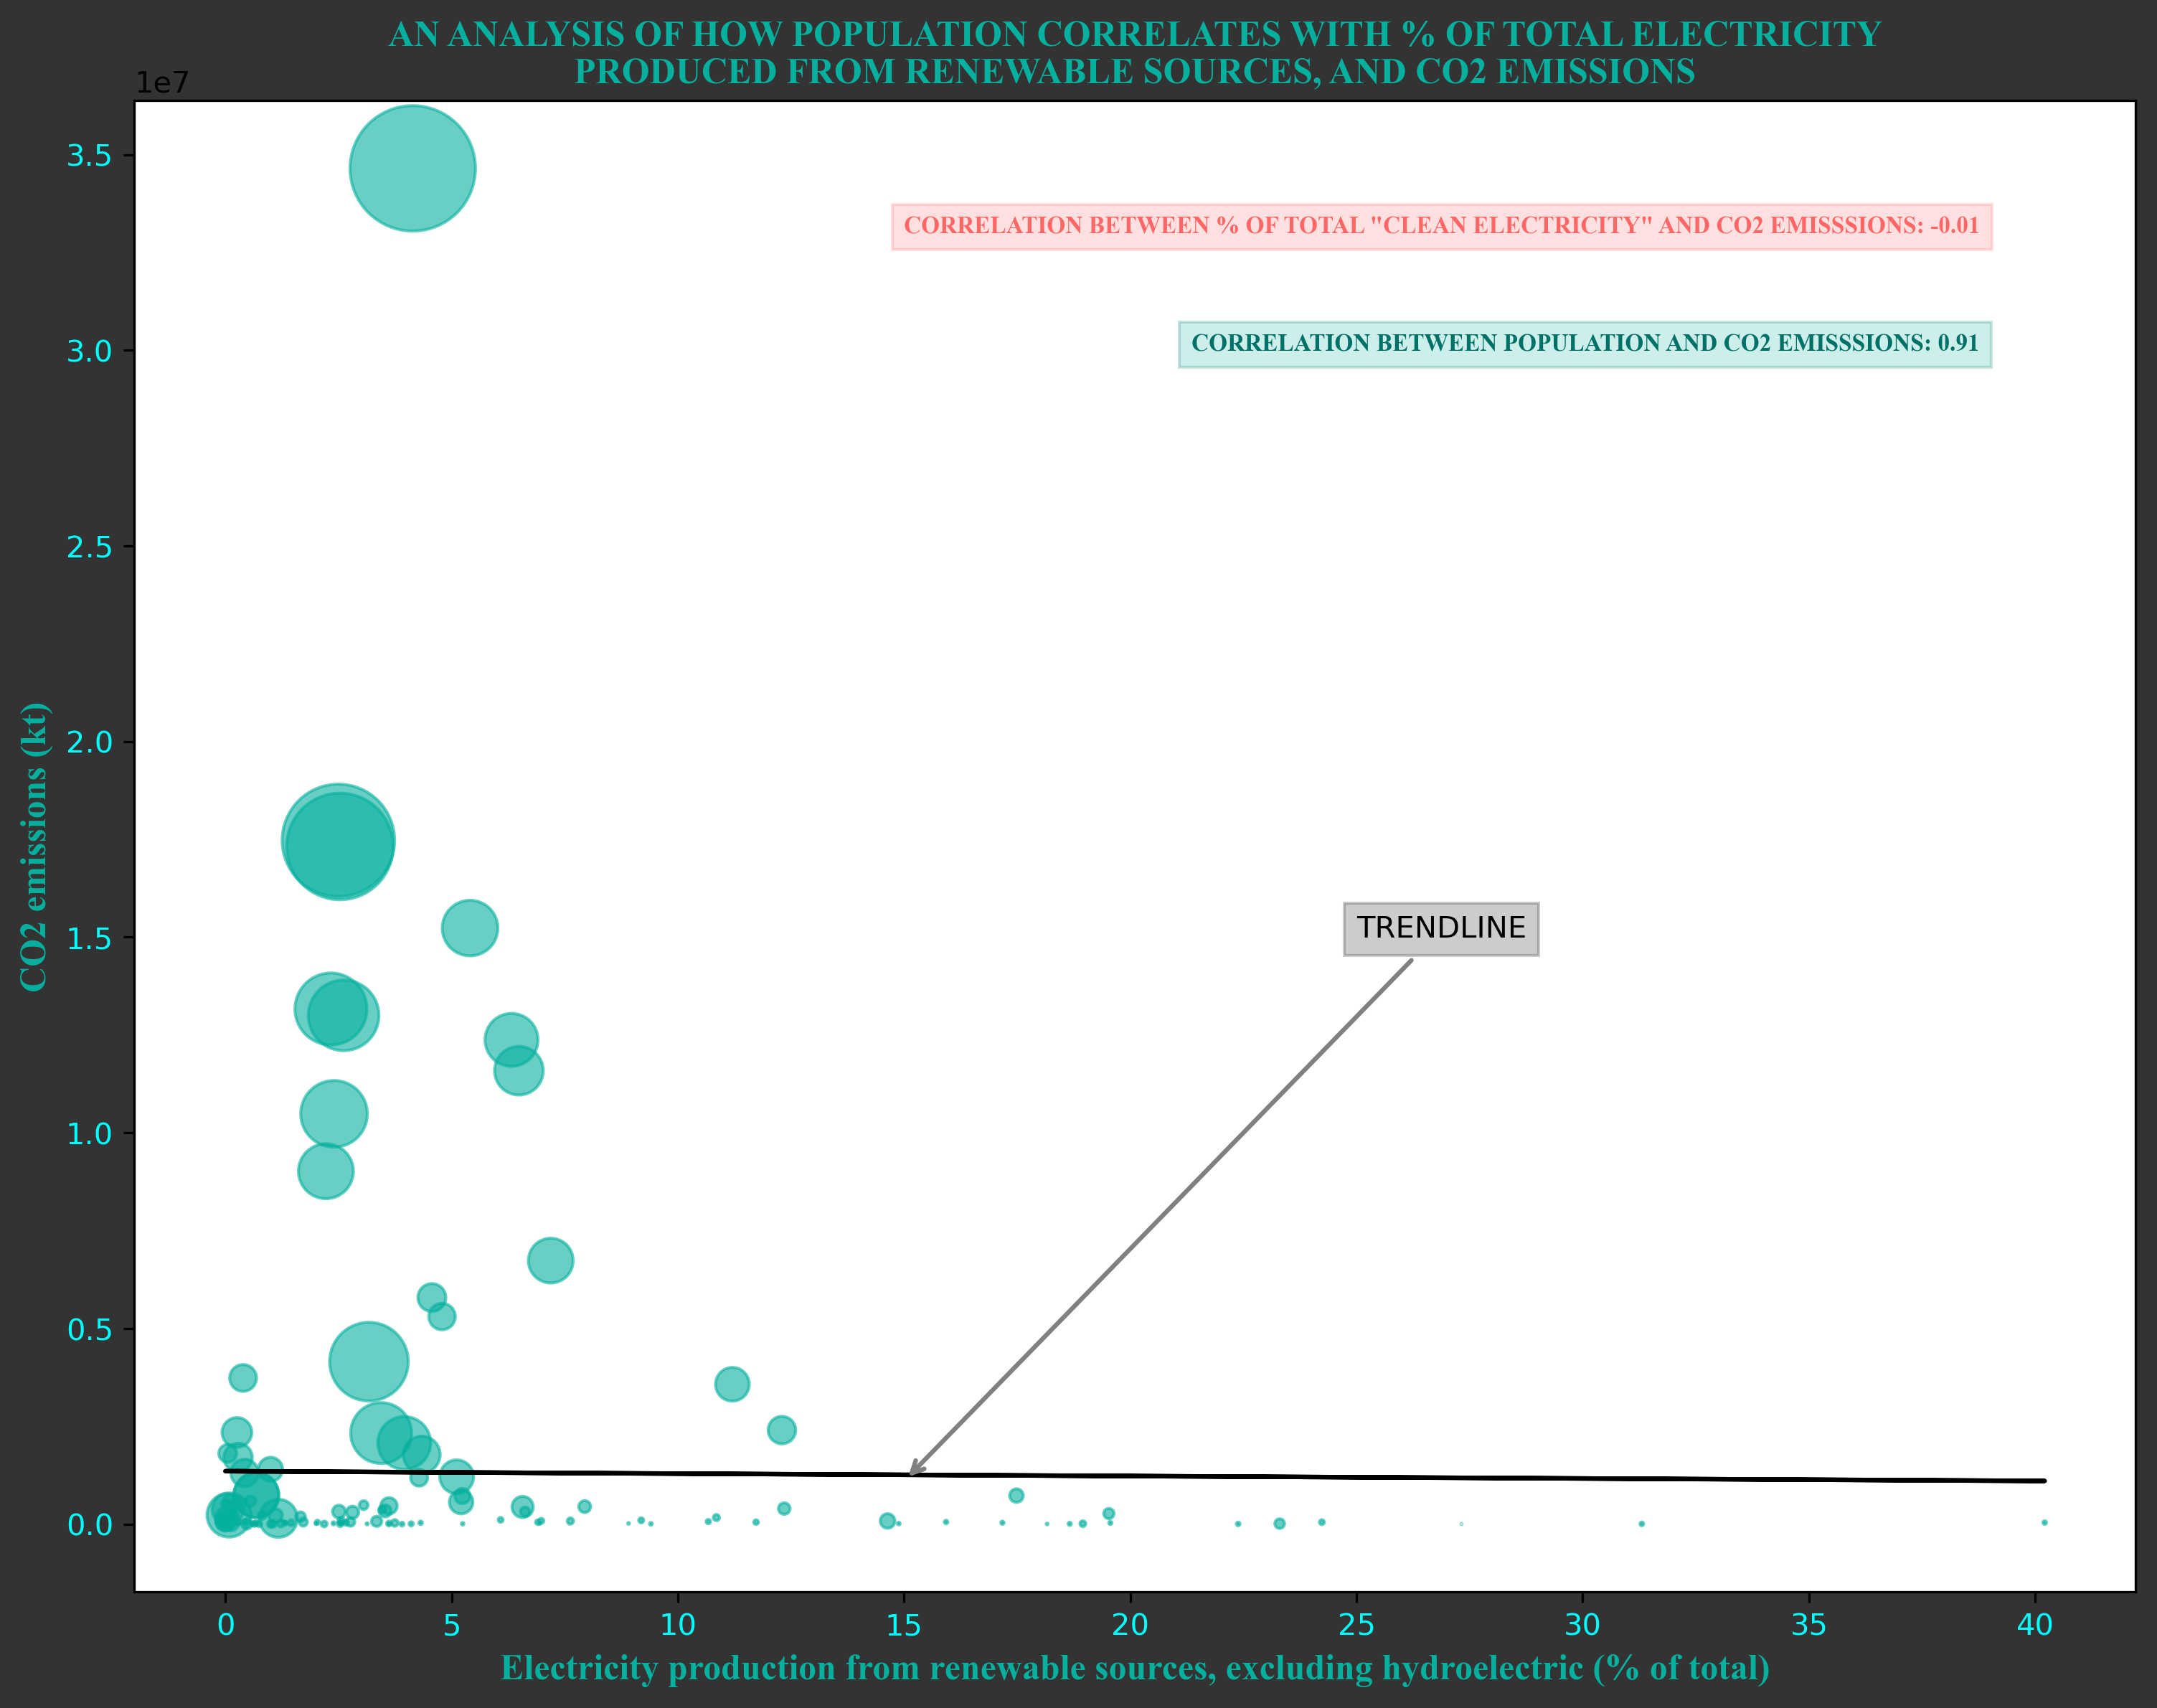

In [423]:
plt.figure(figsize=(12,9), dpi=300)
plt.gcf().set_facecolor('#333333')
plt.xticks(color ='cyan')
#plt.yscale('linear')
plt.yticks(color ='cyan')
plt.scatter(con_data['R_Energy'], con_data['CO2'], s=con_data['e_pop'].values, c= '#05b09e',alpha = 0.6)
plt.xlabel(r_energy['IndicatorName'].iloc[0], fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#05b09e'})
plt.ylabel(emission['IndicatorName'].iloc[0], fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#05b09e'})
plt.title('AN ANALYSIS OF HOW POPULATION CORRELATES WITH % OF TOTAL ELECTRICITY' + chr(10) +'PRODUCED FROM RENEWABLE SOURCES, AND CO2 EMISSIONS', fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#05b09e'})
cor1 = 'CORRELATION BETWEEN POPULATION AND CO2 EMISSSIONS: '+ str(np.round((np.corrcoef(con_data['pop'], con_data['CO2'])[1,0]), 2))
plt.text(21.35, 3e7,cor1, fontdict={'fontname': 'Times New Roman', 'fontsize': 8, 'fontweight':'bold', 'color':'#007166'},  bbox=dict(fc='#05b09e', ec='#007166', alpha=0.2, color='#05b09e'))
cor2 = 'CORRELATION BETWEEN % OF TOTAL \"CLEAN ELECTRICITY\" AND CO2 EMISSSIONS: '+ str(np.round((np.corrcoef(con_data['R_Energy'], con_data['CO2'])[1,0]), 2))
plt.text(15, 3.3e7,cor2, fontdict={'fontname': 'Times New Roman', 'fontsize': 8, 'fontweight':'bold', 'color':'#ff6766'},  bbox=dict(fc='#ff6766', ec='#ff6766', alpha=0.2, color='#05b09e'))

#trendline
slope, intercept = np.polyfit(con_data['R_Energy'], con_data['CO2'], 1)
plt.plot(con_data['R_Energy'], slope*con_data['R_Energy']+ intercept, 'k-')
plt.annotate(text='TRENDLINE', xytext=(25,1.5e7), xy=(15,0.11e7), arrowprops=dict(arrowstyle= '->',color='gray',lw=1.5), bbox=dict(fc='k', alpha=0.2))

plt.show()

## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> CO2 EMISSION VS CO2 EMISSION PER CAPITA

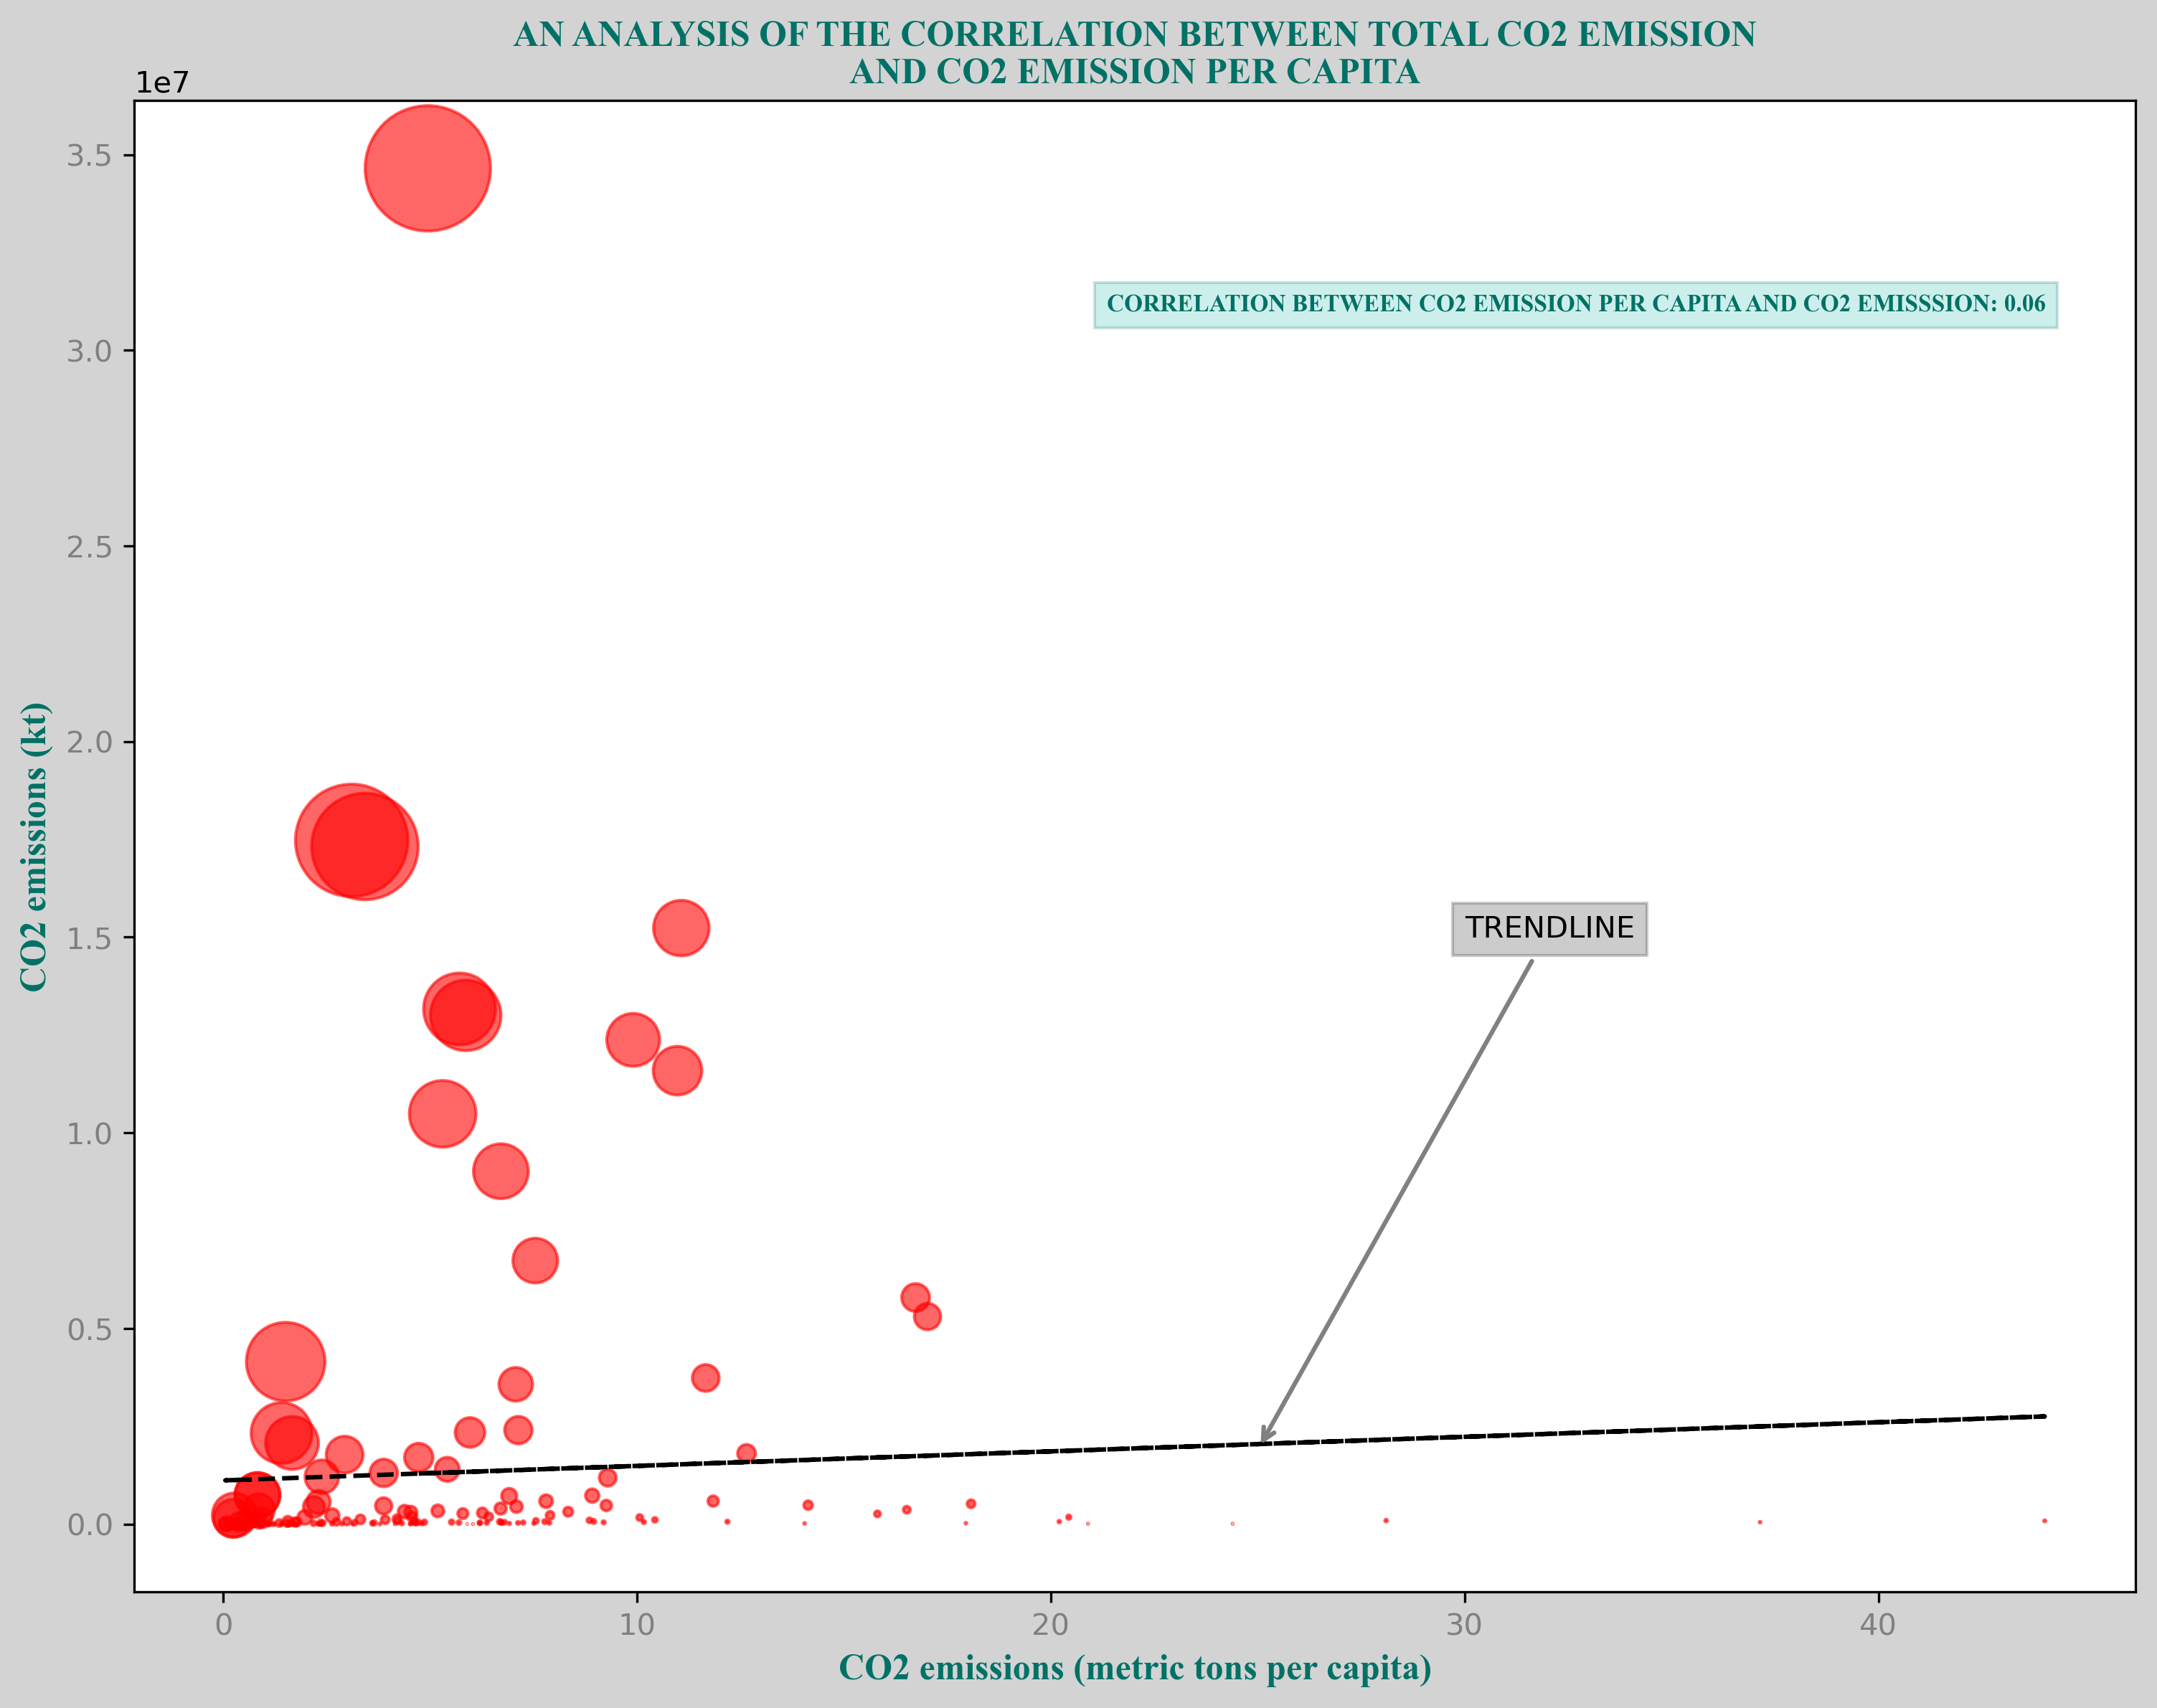

In [425]:
#scatter
plt.figure(figsize=(12,9), dpi=300)
plt.gcf().set_facecolor('lightgray')
plt.xticks(color ='gray')
plt.yscale('linear')
plt.yticks(color ='gray')
plt.scatter(con_data['CO2pc'], con_data['CO2'], s=con_data['e_pop'].values, c= 'red',alpha = 0.6)
plt.xlabel(emission_percap['IndicatorName'].iloc[0], fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#007166'})
plt.ylabel(emission['IndicatorName'].iloc[0], fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#007166'})
plt.title('AN ANALYSIS OF THE CORRELATION BETWEEN TOTAL CO2 EMISSION'+chr(10)+'AND CO2 EMISSION PER CAPITA', fontdict={'fontname': 'Times New Roman', 'fontsize': 12, 'fontweight':'bold', 'color':'#007166'})
cor1 = 'CORRELATION BETWEEN CO2 EMISSION PER CAPITA AND CO2 EMISSSION: '+ str(np.round((np.corrcoef(con_data['CO2pc'], con_data['CO2'])[1,0]), 2))
plt.text(21.35, 3.1e7,cor1, fontdict={'fontname': 'Times New Roman', 'fontsize': 8, 'fontweight':'bold', 'color':'#007166'},  bbox=dict(fc='#05b09e', ec='#007166', alpha=0.2, color='#05b09e'))

#trendline
slope, intercept = np.polyfit(con_data['CO2pc'], con_data['CO2'], 1)
plt.plot(con_data['CO2pc'], slope*con_data['CO2pc']+ intercept, 'k--')
plt.annotate(text='TRENDLINE', xytext=(30,1.5e7), xy=(25,0.19e7), arrowprops=dict(arrowstyle= '->',color='gray',lw=1.5), bbox=dict(fc='k', alpha=0.2))
plt.show()

## <p style = "font-family: Times New Roman; font-size: 0.55em; color: GRAY; font-style: bold"> PLOTTING HEATMAP

In [421]:
map = folium.Map(location=[100, 0], zoom_start=1.5)
HeatMap(htmap_data).add_to(map)

In [422]:
map.save('heat_map.html')